In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train-smoking.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [4]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
df['smoking'].value_counts()

0    89603
1    69653
Name: smoking, dtype: int64

In [6]:
corr = df.corr()
corr.smoking.sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
waist(cm)              0.262715
ALT                    0.163016
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
AST                    0.059394
systolic               0.058642
id                    -0.000632
Urine protein         -0.028548
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.051896
LDL                   -0.072285
age                   -0.206033
HDL                   -0.271186
Name: smoking, dtype: float64

<Axes: >

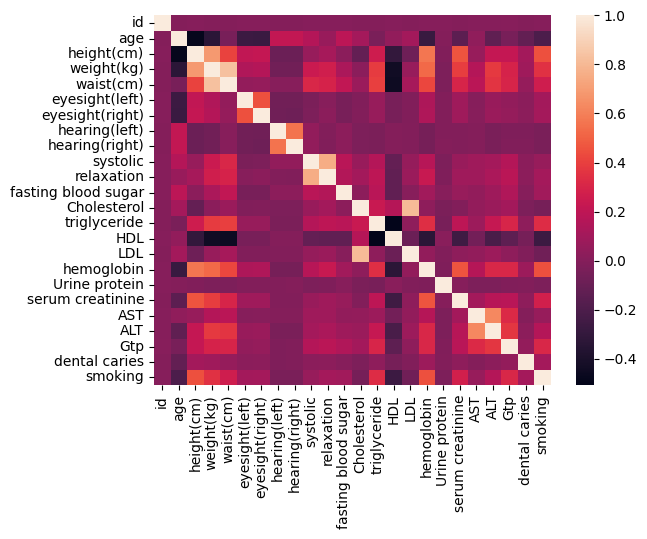

In [7]:
sns.heatmap(corr, annot=False)

In [8]:
x = df.drop(['id','smoking'],axis=1)
y = df.smoking
print(x)
print(y)

        age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0        55         165          60       81.0             0.5   
1        70         165          65       89.0             0.6   
2        20         170          75       81.0             0.4   
3        35         180          95      105.0             1.5   
4        30         165          60       80.5             1.5   
...     ...         ...         ...        ...             ...   
159251   40         155          45       69.0             1.5   
159252   50         155          75       82.0             1.0   
159253   40         160          50       66.0             1.5   
159254   50         165          75       92.0             1.2   
159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                   0.6              1               1       135          87   
1                   0.7              2         

In [30]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((127404, 22), (31852, 22), (127404,), (31852,))

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1472      
                                                                 
 dense_13 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(Xtrain.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(Xtrain, Ytrain, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(Xtest, Ytest)
print(f'Test Accuracy: {test_acc}')

# Make predictions
y_pred = model.predict(Xtest)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate accuracy
accuracy = accuracy_score(Ytest, y_pred_binary)
print(f'Accuracy on Test Set: {accuracy}')


Epoch 1/10
3186/3186 [==============================] - 10s 3ms/step - loss: 0.7187 - accuracy: 0.6953 - val_loss: 0.5620 - val_accuracy: 0.7415
Epoch 2/10
3186/3186 [==============================] - 9s 3ms/step - loss: 0.6015 - accuracy: 0.7098 - val_loss: 0.6041 - val_accuracy: 0.7164
Epoch 3/10
3186/3186 [==============================] - 8s 2ms/step - loss: 0.5777 - accuracy: 0.7187 - val_loss: 0.8379 - val_accuracy: 0.6673
Epoch 4/10
3186/3186 [==============================] - 8s 3ms/step - loss: 0.5732 - accuracy: 0.7181 - val_loss: 0.5285 - val_accuracy: 0.7467
Epoch 5/10
3186/3186 [==============================] - 7s 2ms/step - loss: 0.5614 - accuracy: 0.7206 - val_loss: 0.5074 - val_accuracy: 0.7471
Epoch 6/10
3186/3186 [==============================] - 9s 3ms/step - loss: 0.5504 - accuracy: 0.7251 - val_loss: 0.4984 - val_accuracy: 0.7490
Epoch 7/10
3186/3186 [==============================] - 8s 3ms/step - loss: 0.5439 - accuracy: 0.7245 - val_loss: 0.5274 - val_accuracy

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Ytest, y_pred_binary))

              precision    recall  f1-score   support

           0       0.88      0.62      0.73     17783
           1       0.65      0.89      0.75     14069

    accuracy                           0.74     31852
   macro avg       0.76      0.75      0.74     31852
weighted avg       0.78      0.74      0.74     31852



Text(0.5, 1.0, 'Practical vs Predicted Values')

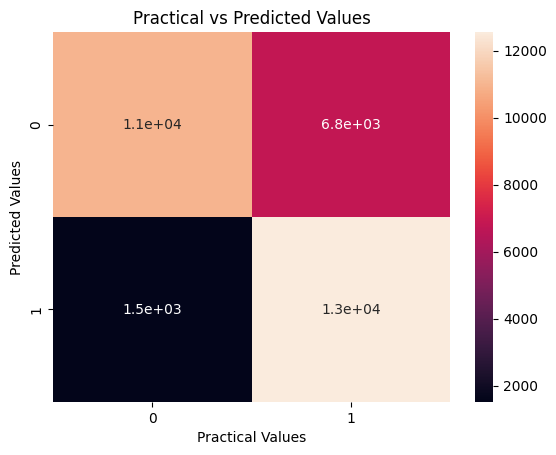

In [35]:
sns.heatmap(confusion_matrix(Ytest, y_pred_binary), annot=True)
plt.xlabel('Practical Values')
plt.ylabel('Predicted Values')
plt.title('Practical vs Predicted Values')